In [ ]:
# Import required libraries for analysis
import numpy as np
import pandas as pd

# Import required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create DataFrame 'cgd' by importing 'Cardio Good Fitness' file and make a copy of it just in case if need to revert back
cgd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CardioGoodFitness.csv')
cgd_copy = cgd.copy()

In [ ]:
# First glance of data
cgd.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Finding out # of rows and columns
cgd.shape

(180, 10)

In [ ]:
# Finding datatypes
cgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                180 non-null    object 
 1   Age                    180 non-null    int64  
 2   Gender                 180 non-null    object 
 3   Education              180 non-null    int64  
 4   MaritalStatus          180 non-null    object 
 5   Usage                  180 non-null    int64  
 6   Fitness                180 non-null    int64  
 7   Income                 180 non-null    int64  
 8   Miles                  180 non-null    int64  
 9   Avg_miles_in_each_use  180 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 14.2+ KB


Observations

1) cgd dataframe doesn't have NULLs (missing values) in any columns because NON-NULL counts of all columns match with number of rows

2) All the columns seems to have appropirate datatypes

In [ ]:
# Checking for duplicates
cgd.duplicated().sum()

0

Observation - there are no duplicate records in a dataframe

In [ ]:
# Statastical Summary of cgd to get general idea about the dataframe
cgd.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.000000,24.000000,26.000000,33.000000,50.000000
Education,180.0,15.572222,1.617055,12.000000,14.000000,16.000000,16.000000,21.000000
Usage,180.0,3.455556,1.084797,2.000000,3.000000,3.000000,4.000000,7.000000
Fitness,180.0,3.311111,0.958869,1.000000,3.000000,3.000000,4.000000,5.000000
Income,180.0,53719.577778,16506.684226,29562.000000,44058.750000,50596.500000,58668.000000,104581.000000
Miles,180.0,103.194444,51.863605,21.000000,66.000000,94.000000,114.750000,360.000000
Avg_miles_in_each_use,180.0,0.565622,0.177496,0.201923,0.451923,0.544872,0.634615,1.730769


# **Customer profiling (characteristics of a customer) of the different products**

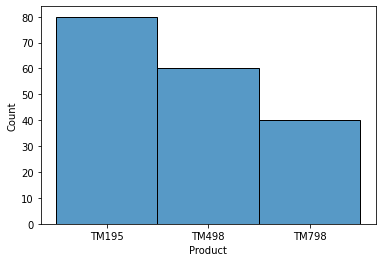

In [ ]:
# Plotting historgram of a Product to get basic idea of each products and its counts in dataframe
sns.histplot(data=cgd,x='Product');

In [ ]:
# checking the exact count of each product as bit hard to find from above histogram
cgd['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Observation - there are only 3 different types of products and counts of each are 80, 60 and 40

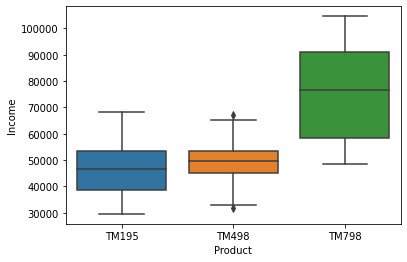

In [ ]:
# Boxplot the products by Income 
sns.boxplot(data=cgd,x='Product',y='Income');

Observations 

1) Customer with higher income tends to buy Product 'TM798' more compare to lower income people. That makes me  guess 'TM798' could be of a higher value and so possibly with more and advanced features. 

2) Customer with lower income tends to prefer 'TM195'. That makes me guess 'TM195' could be the cheaper and more basic version. It has the highest number of customers too, which kind of go in line with basic models tend to sell more than advanced ones.

3) Customers of upper half of lower income or say moderate income ones, prefer 'TM498' - which could be bit advanced and costlier from 'TM195' but lesser than 'TM798'.

4) None of the products seem to have many outliers

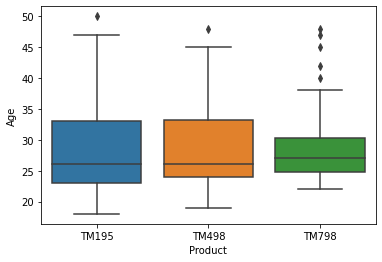

In [ ]:
# Boxplot the products by Age
sns.boxplot(data=cgd,x='Product',y='Age');

Observations 

1) Almost same age of cusotmers buy products 'TM195' and 'TM498'. Both have minimal outliers.

2) Median age of customer of product 'TM798' is bit higer than other 2 products, not much. However, there are many outliers for this product which makes me assume that older people buy higher, advanced and expensive model (based on previous observations). 

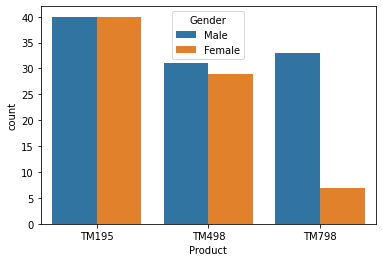

In [ ]:
# Checking for Male/Female ratio by different products
sns.countplot(data=cgd,x='Product',hue='Gender');

Observations 

1) Not much difference shown in gender for products 'TM195' and 'TM498'. Almost equal number of males and females seem to buy these 2 products. 

2) 'TM798', which was observed earlier as more popular in higher income people, male customers are way higher than female customers. 

Based on 2nd observation, I should check how is male-female ratio in higer income people to really make sure only high income males prefer 'TM798' or it's just because there are more males with higher income.

In [ ]:
# Creating a new column in dataframe that will combine gender and maritalstatus values
cgd['Gender_Mstatus'] = cgd['Gender'] + ' ' + cgd['MaritalStatus']

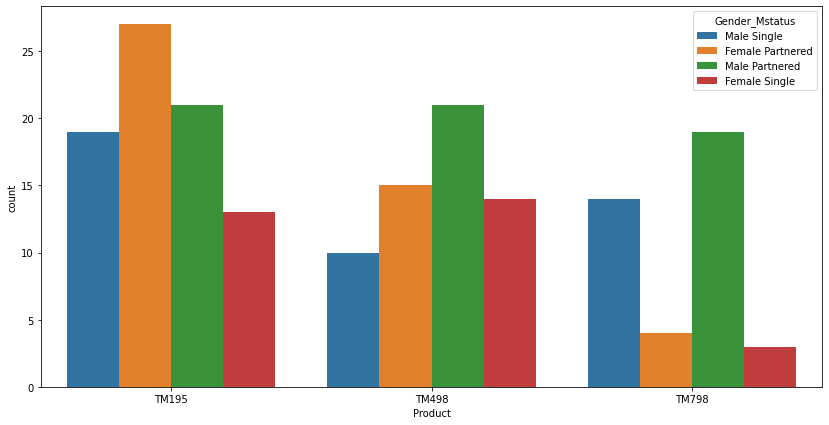

In [ ]:
# Checking for Gender+MaritalStatus ratio by different products
plt.figure(figsize=(14,7))
sns.countplot(data=cgd,x='Product',hue='Gender_Mstatus');

Observations 

1) Female Partnered has the highest count among all the 4 combinations for 'TM195' and least for 'TM798'

2) Male Single has the highest count for 'TM195'

3) Male Partnered is almost equally divided among all 3 products

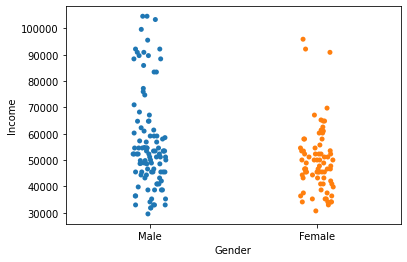

In [ ]:
# Plotting male and female by Income 
sns.stripplot(data=cgd,x='Gender',y='Income');

Observation - very less females in higher income range compare to male

In [ ]:
# Based on above observation, let's check how is male-female ration
cgd['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
cgd['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

Observation - Male-Female ratio is not exactly divided but it's not way off as well. 58/42 is not much off.



In [ ]:
# As per box plot analysis of Products by Income, it was observed that product 'TM798' customers have income starting around 60,000. So would like to see the ratio of male-female earning more than 60K
cgd.loc[cgd['Income']>60000,'Gender'].value_counts()

Male      29
Female    13
Name: Gender, dtype: int64

In [ ]:
cgd.loc[cgd['Income']>60000,'Gender'].value_counts(normalize=True)

Male      0.690476
Female    0.309524
Name: Gender, dtype: float64

Observation - even though the male-female ratio in "higher" income bracket is 70/30 (not as close as 58/42 on total population), still male customers with higher income tend to buy 'TM798' more than female customer. 

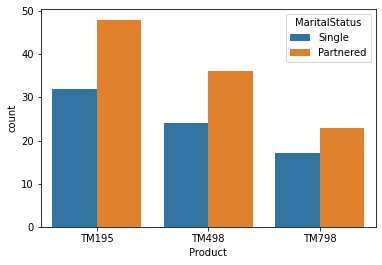

In [ ]:
# Plotting different marital statuses by different products
sns.countplot(data=cgd,x='Product',hue='MaritalStatus');

Observation - Marital status is not really affecting what particular product customers want to buy. 

More analysis (univariate/bivariate/multivariate) to be done in next sections and final observations of a customer profile would be provided based ont that. 


# Univariate Analysis

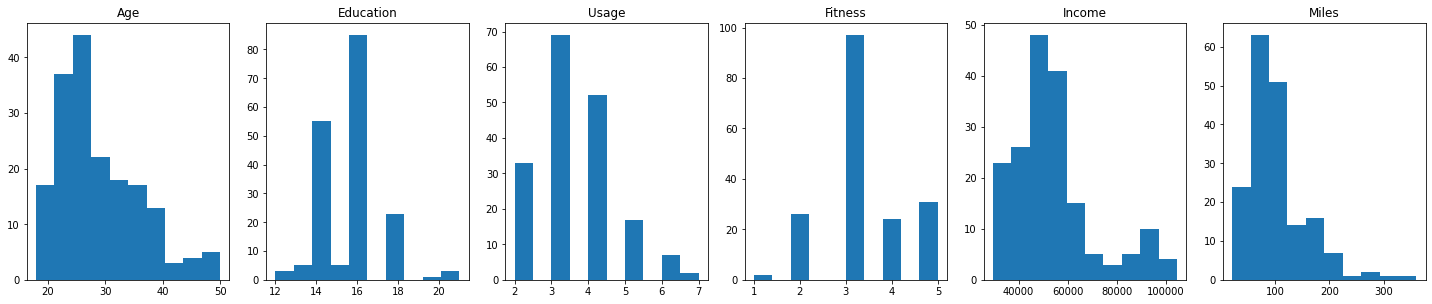

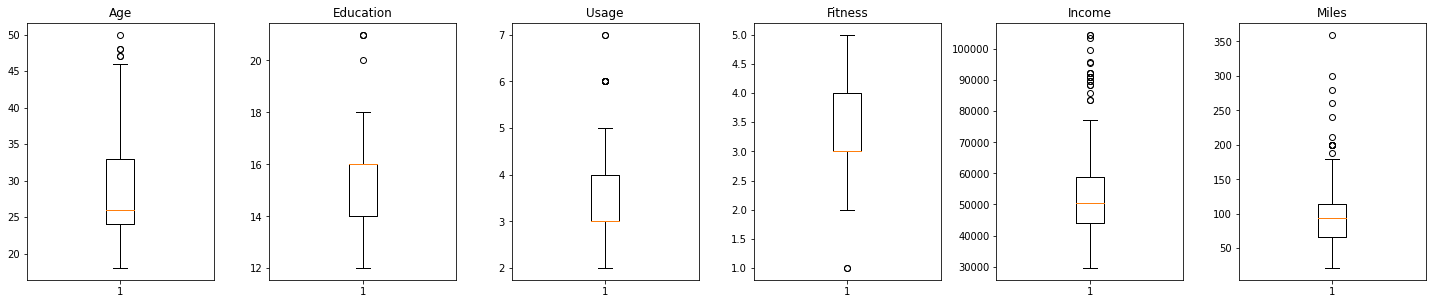

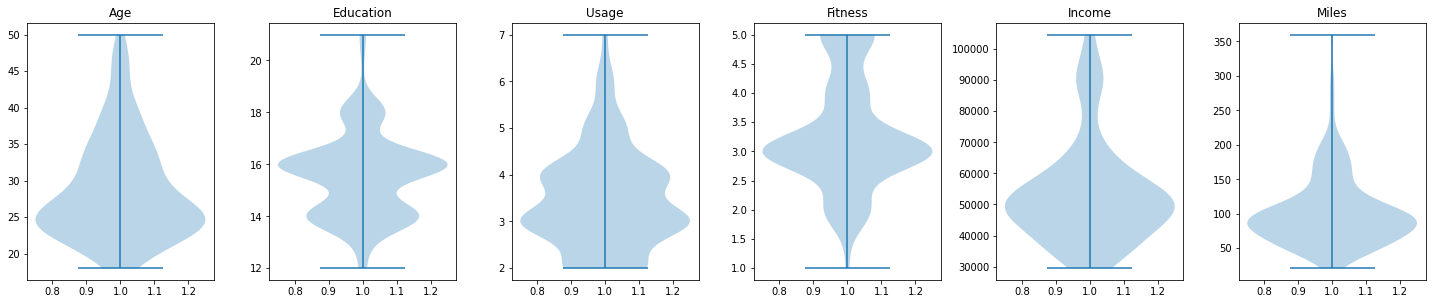

In [ ]:
# Plotting Histogram and Boxplot for all the numeric columns to see the skewness and outliers in each of those columns
numeric_cols = ['Age','Education','Usage','Fitness','Income','Miles']
plt.figure(figsize=(20, 12))
for i, j in enumerate(numeric_cols):
    plt.subplot(3, 6, i + 1)
    plt.hist(cgd[j])
    plt.tight_layout()
    plt.title(j)

plt.show()
plt.figure(figsize=(20, 12))
for i, j in enumerate(numeric_cols):
    plt.subplot(3, 6, i + 1)
    plt.boxplot(cgd[j], whis=1.5)
    plt.tight_layout()
    plt.title(j)

plt.show()

plt.figure(figsize=(20, 12))
for i, j in enumerate(numeric_cols):
    plt.subplot(3, 6, i + 1)
    plt.violinplot(cgd[j])
    plt.tight_layout()
    plt.title(j)

plt.show()


Observations 

1) Age is skewed right and has few outliers at higher end. Majority of customers are between ~22 and ~38 age. 

2) Majority of customers have the 16 years of education with very few outliers at higher end. 

3) Usage for most of the customers is around 3-4 times a week. It has very few outliers at the higher end.

4) Majority customers rate their fitness at 3 with very rare outlier at the lower end. 

5) Income is skewed right and has many outliers at the higher end. 

6) Miles is also skewed right with many outliers at the higher end. 


In [ ]:
# As seen above Miles have outliers. I like to check if they are really outliers by checking customer's weekly usage
# Create a new column to see how much average miles per each use customer is putting. It can help to see if there are real outliers
cgd['Avg_miles_in_each_use'] = cgd['Miles'] / (cgd['Usage'] * 52)

In [ ]:
cgd.describe()

,Age,Education,Usage,Fitness,Income,Miles,Avg_miles_in_each_use
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,0.565622
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,0.177496
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,0.201923
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,0.451923
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,0.544872
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,0.634615
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,1.730769


Observation - By looking at max value, 1.7 miles per each use, doesn't look like much. I do not think there is a need to treat outliers for Miles

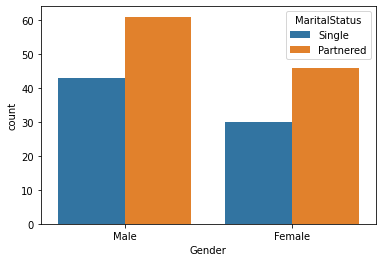

In [ ]:
sns.countplot(data=cgd,x='Gender', hue='MaritalStatus');

Observation - Partnered people (both male and female) buy more treadmill compare to single people

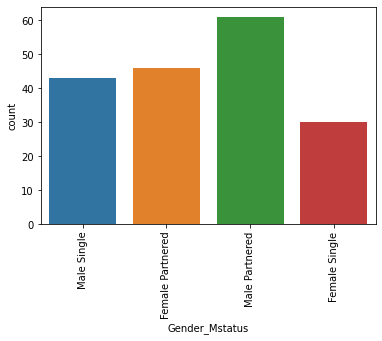

In [ ]:
# Plotting bar graph to see the count with the newly created column
sns.countplot(data=cgd,x='Gender_Mstatus')
plt.xticks(rotation=90);

Observation - Highest customers are Male & Partnered 

# Bivariate & Multivariate Analysis

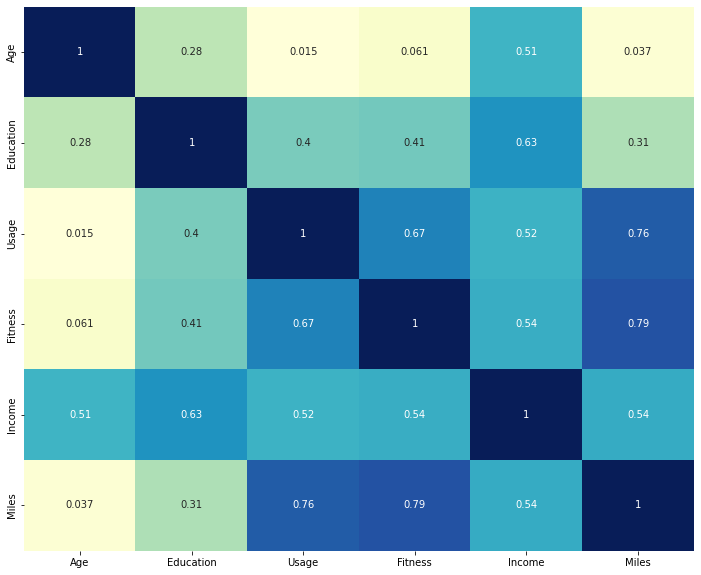

In [ ]:
# To start with, creating correlation graph just to understand the relations between different columns
plt.figure(figsize = (12, 10))
sns.heatmap(data=cgd[['Product','Age','Gender','Education','MaritalStatus','Usage','Fitness','Income','Miles']].corr(),annot=True,cmap='YlGnBu',cbar=False);

Observations 

1) Number of Miles in a year is highly positively correlated with Fitness and Usage. And so the Usage and Fitness with each other.

2) Age has not much to do with number of Miles, Fitness or Usage of treadmill.It's really correlate with anything except Income.

3) Income is more than 50% positively correlated with every columns of dataframe. 

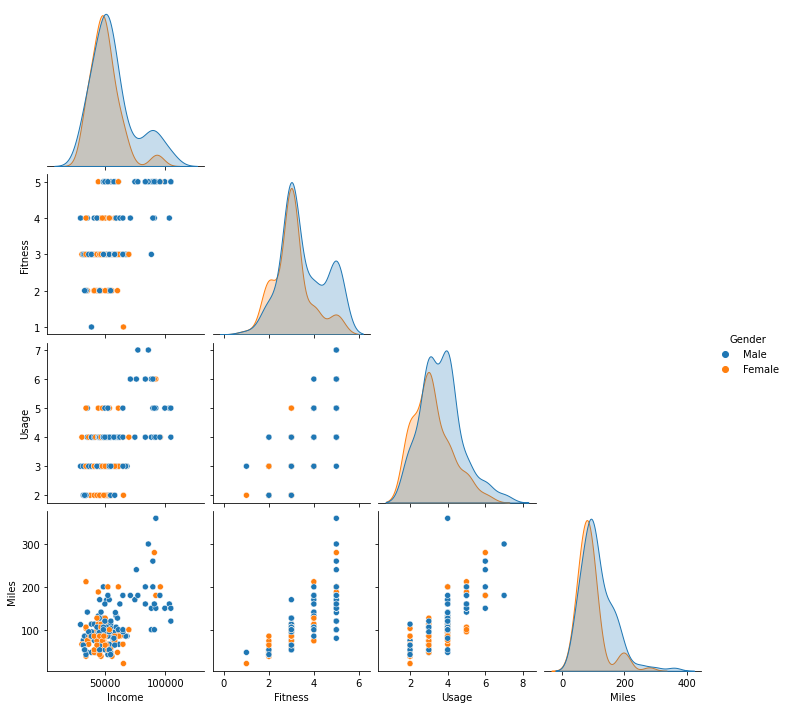

In [ ]:
#Another way to check out and validate above observations
sns.pairplot(data=cgd, diag_kind='kde',hue='Gender',vars=['Income','Fitness','Usage','Miles'],corner=True);

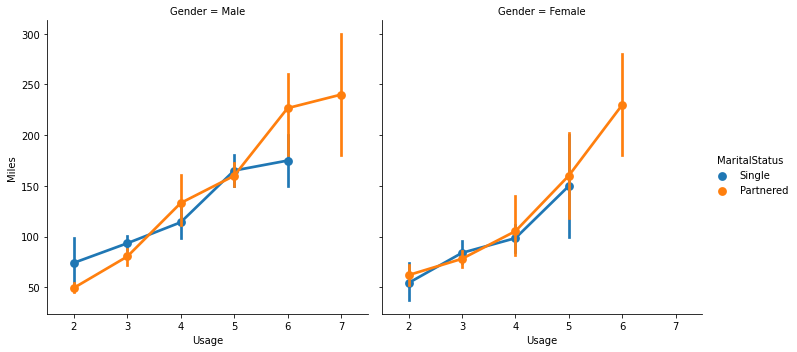

In [ ]:
# Plotting Usage and Miles by marital status
sns.catplot(data=cgd, x='Usage', y='Miles', col='Gender',hue='MaritalStatus',kind='point');

Observation  

1) it was seen earlier that 'partnered' people buy more treadmill. Also, their usage per week and miles per year is also much higher than single people. 

2) Partnered Male users use more and put more miles on treadmill compare to Partnered female users 

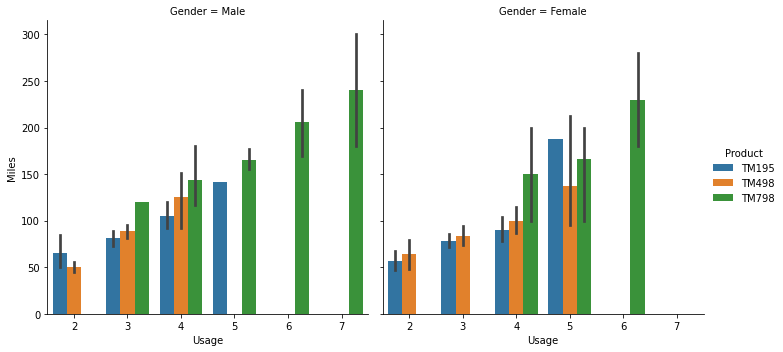

In [ ]:
sns.catplot(data=cgd, x='Usage',y='Miles',col='Gender',hue='Product',kind='bar');

Observation 

1) Both male and female users when they buy product 'TM798' (which is supposed to be more advanced and expensive) - their usage per week and miles per year increases. 

2) Male who bought other than 'TM798' tend to use 40% less than who bought 'TM798'

In [ ]:
cgd['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

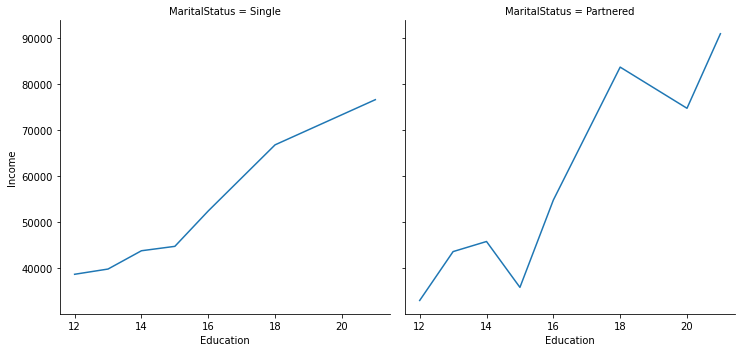

In [ ]:
# Checking the relations between Education and Income
sns.relplot(data=cgd, x='Education',y='Income',col='MaritalStatus',kind='line',ci=None,col_wrap=4);

Observation - In single peple, Income increases with the education. In partnered, it increases after 15 years of education. However, it goes down after 18 years and again goes, so its not consitant.That could very well because of outliers that we saw earlier with boxplot. 

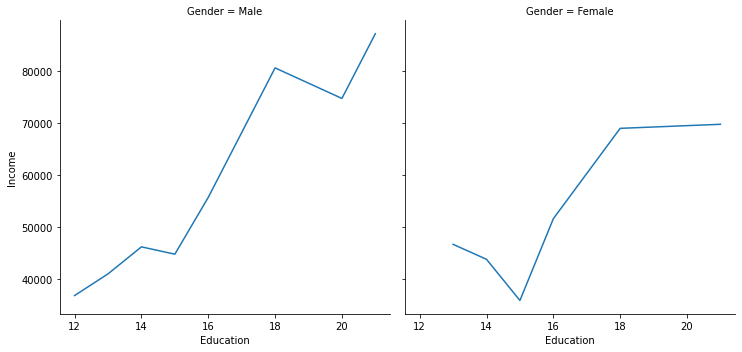

In [ ]:
# Checking again by keeping Gender as column this time
sns.relplot(data=cgd, x='Education',y='Income',col='Gender',kind='line',ci=None,col_wrap=4);

Observation - In males, Income increases with Education until 18 years and then uneven. In female, it goes down until 15 years of eductaion but then increases

In [ ]:
# Checking value counts of Education to see how many outliers are there
cgd['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

Observation - as per the boxplot that was done earlier, the right whisker of Education was at 18. So I can see there are only 4 outliers (20-1,21-3) after 18.

In [ ]:
# Let's check those 4 outliers
cgd.loc[cgd['Education']==20]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Avg_miles_in_each_use,Gender_Mstatus
156,TM798,25,Male,20,Partnered,4,5,74701,170,0.817308,Male Partnered


In [ ]:
cgd.loc[cgd['Education']==21]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Avg_miles_in_each_use,Gender_Mstatus
157,TM798,26,Female,21,Single,4,3,69721,100,0.480769,Female Single
161,TM798,27,Male,21,Partnered,4,4,90886,100,0.480769,Male Partnered
175,TM798,40,Male,21,Single,6,5,83416,200,0.641026,Male Single


In [ ]:
# Treating outlier using the function
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [ ]:
# Create cgd_mod dataframe from cgd to remove outliers

cgc_mod = cgd.copy()

In [ ]:
# Removing outliers of Education
cgd_mod = treat_outliers(cgd,'Education')

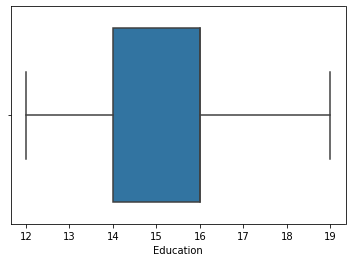

In [ ]:
# Making sure if the outliers were removed
sns.boxplot(data=cgd_mod,x='Education')
plt.show()

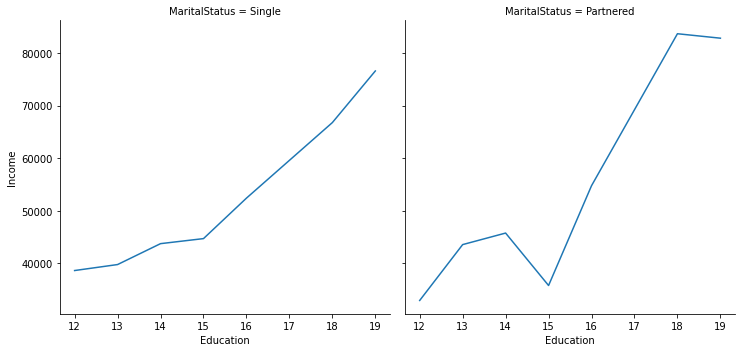

In [ ]:
# Checking the relations between Education and Income again
sns.relplot(data=cgd_mod, x='Education',y='Income',col='MaritalStatus',kind='line',ci=None,col_wrap=4);

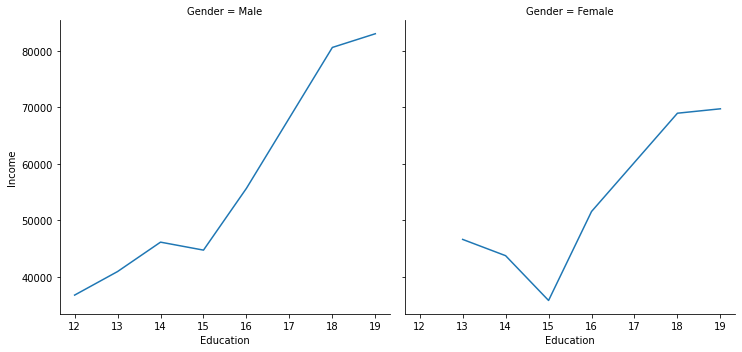

In [ ]:
# Checking again by keeping Gender as column this time
sns.relplot(data=cgd_mod, x='Education',y='Income',col='Gender',kind='line',ci=None,col_wrap=4);

Observations remained as predicted

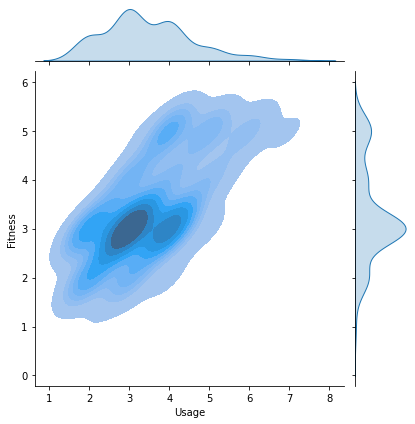

In [ ]:
# Plotting Usage and Fitness relations
sns.jointplot(data=cgd, x='Usage', y='Fitness',kind='kde',fill=True);

Observation - Earlier it was observed that Fitness and Usage were correlated. Maximum custoemrs who uses treadmill 3 times a week, consider their fitness level at 3. 

# Final Observations and Insights

**Customer Profile of Different Products**

1) Customer with higher income tends to buy Product 'TM798' more compare to lower income people. That makes me guess 'TM798' could be of a higher value and so possibly with more and advanced features.

2) Customer with lower income tends to prefer 'TM195'. That makes me guess 'TM195' could be the cheaper and more basic version. It has the highest number of customers too, which kind of go in line with basic models tend to sell more than advanced ones.

3) Customers of upper half of lower income or say moderate income ones, prefer 'TM498' - which could be bit advanced and costlier from 'TM195' but lesser than 'TM798'.

4) Alogn with high income people, product 'TM798' is more popular towards males than females. 

5) Marital status is not really affecting what particular product customers want to buy. However, partnered people seem to buy more products in general and their usage per week and miles per year are move compare to single.

6) Female & Partnered have the highest count among all the 4 combinations for 'TM195' and least for 'TM798'. Male & Single prefers max 'TM195' as well.



**Summary of General Observations**

1) Age is skewed right and has few outliers at higher end. Majority of customers are between ~22 and ~38 age.

2) Majority of customers have the 16 years of education with very few outliers at higher end.

3) Usage for most of the customers is around 3-4 times a week. It has very few outliers at the higher end.

4) Majority customers rate their fitness at 3 with very rare outlier at the lower end.

5) Income is skewed right and has many outliers at the higher end.  Also most of the customers are kind of lower income range (~70K)

6) Miles is also skewed right with many outliers at the higher end.

7) In males, Income increases with Education until 18 years and then uneven. In female, it goes down until 15 years of eductaion but then increases steadily

8) In single peple, Income increases with the education. In partnered, it increases after 15 years of education. However, it goes down after 18 years and again goes, so its not consitant. Removing outliers didn't change much either.

9) Both male and female users when they buy product 'TM798' (which is supposed to be more advanced and expensive) - their usage per week and miles per year increases. 

10) Male who bought other than 'TM798' tend to use 40% less than who bought 'TM798'

11) Partnered Male users use more and put more miles on treadmill compare to Partnered female users


**Insights & Recommendations**

1) 'TM195' is the most popular among lower income people (<70K). It could be due to it's very basic and cheaper model. TM498 seems to be bit advanced and expensive and also popular among same lower income people, should target lower income people for both of these models 

2) Observed that females customers are less than male. However, female partnered are the highest customers in 'TM195' model and they are the lowest in most advanced 'TM798'. The advertise campaigns should target partnered females to purchase 'TM798', may give some first time buyer discount or provide lower monthly installment options, some gift with purchase options like appreal or shoes to attract them. 

3) Majority of customers are of 25 & 40. However, 'TM798' is very popular among older people with higher income. Sale team should target older people with lower income, may be with cheaper models to increase sales. 

4) Majority of customers have 16 years of education, so I guess that's undergraduates. Sales should focus on the groups that have finished college for future promotions as they are likely to buy the most. 

5) People who considers their fitness level at 3 buys the most. Company should either do or use existing market surveys about the people's fitness levels. And then to attract people with lower fitness level, sales and marketing team should come up with a campaign strategy to show them the importance or fitness and usage and may be start with basic model. Also, people with higher fitness level and higher usage, send them one time discount coupons on higher model or some appreals to attract them.